# Word Embeddings and Next Word Prediction using LSTM

Shivam Kumar        (MCA/10001/22)

Priti Lohra         (MCA/10011/22)

Jeet Vidyarthi      (MCA/10020/22)

Amit Anurag Sanga   (MCA/10031/22)

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import regex as re
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [2]:
def file_to_sentence_list(file_path):
    with open(file_path, 'r') as file:
        text = file.read()

        # Splitting the text into sentences using delimiters like '.', '?', and '!'
        sentences = [sentence.strip() for sentence in re.split(
            r'(?<=[.!?])\s+', text) if sentence.strip()]
    return sentences

In [3]:
file_path = '/Users/amitsanga/Downloads/pizza.txt'
text_data = file_to_sentence_list(file_path)

In [4]:
# Tokenize the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(text_data)
total_words = len(tokenizer.word_index) + 1

In [5]:
# Create input sequences
input_sequences = []
for line in text_data:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

In [6]:
# Pad sequences and split into predictors and label
max_sequence_len = max([len(seq) for seq in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))
X, y = input_sequences[:, :-1], input_sequences[:, -1]

In [7]:
# Convert target data to one-hot encoding
y = tf.keras.utils.to_categorical(y, num_classes=total_words)

In [8]:
# Define the model
model = Sequential()
model.add(Embedding(total_words, 10, input_length=max_sequence_len-1))
model.add(LSTM(128))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])

In [9]:
# Train the model with added visualization
history = model.fit(X, y, epochs=80, verbose=1)

Epoch 1/80
51/51 [==============================] - 1s 15ms/step - loss: 6.2162 - accuracy: 0.0375
Epoch 2/80
51/51 [==============================] - 1s 15ms/step - loss: 5.7946 - accuracy: 0.0504
Epoch 3/80
51/51 [==============================] - 1s 16ms/step - loss: 5.7310 - accuracy: 0.0553
Epoch 4/80
51/51 [==============================] - 1s 16ms/step - loss: 5.7038 - accuracy: 0.0510
Epoch 5/80
51/51 [==============================] - 1s 16ms/step - loss: 5.6733 - accuracy: 0.0522
Epoch 6/80
51/51 [==============================] - 1s 16ms/step - loss: 5.6301 - accuracy: 0.0565
Epoch 7/80
51/51 [==============================] - 1s 16ms/step - loss: 5.5777 - accuracy: 0.0602
Epoch 8/80
51/51 [==============================] - 1s 16ms/step - loss: 5.5275 - accuracy: 0.0577
Epoch 9/80
51/51 [==============================] - 1s 16ms/step - loss: 5.4763 - accuracy: 0.0590
Epoch 10/80
51/51 [==============================] - 1s 17ms/step - loss: 5.4266 - accuracy: 0.0608
Epoch 11/

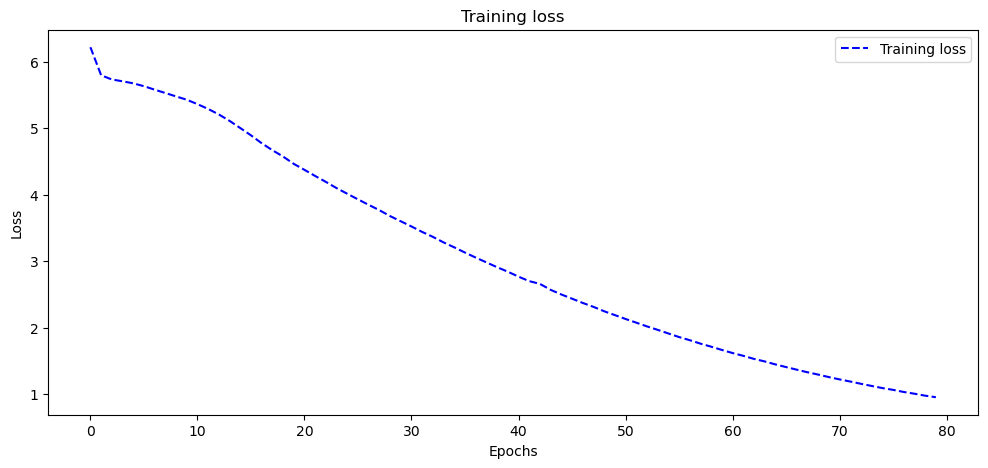

In [10]:
# Plotting loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 1, 1)
plt.plot(history.history['loss'], 'b--', label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

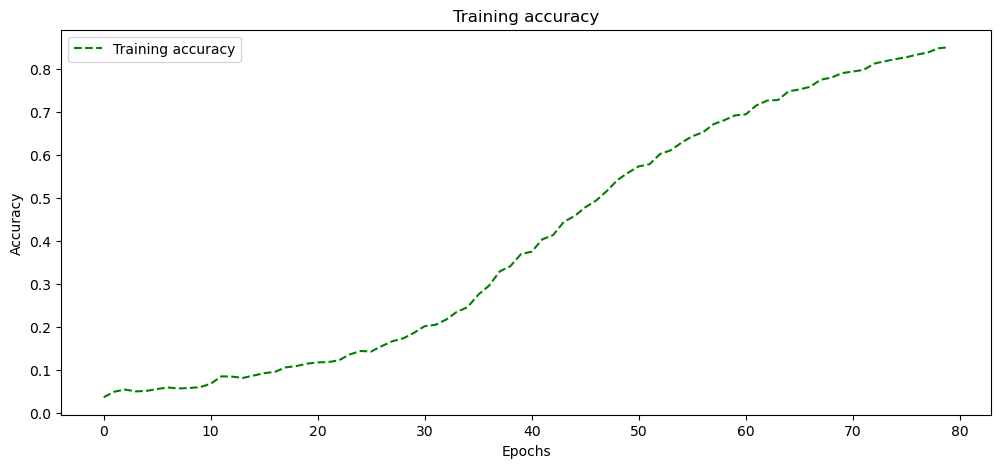

In [11]:
# Plotting accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 1, 1)
plt.plot(history.history['accuracy'], 'g--', label='Training accuracy')
plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

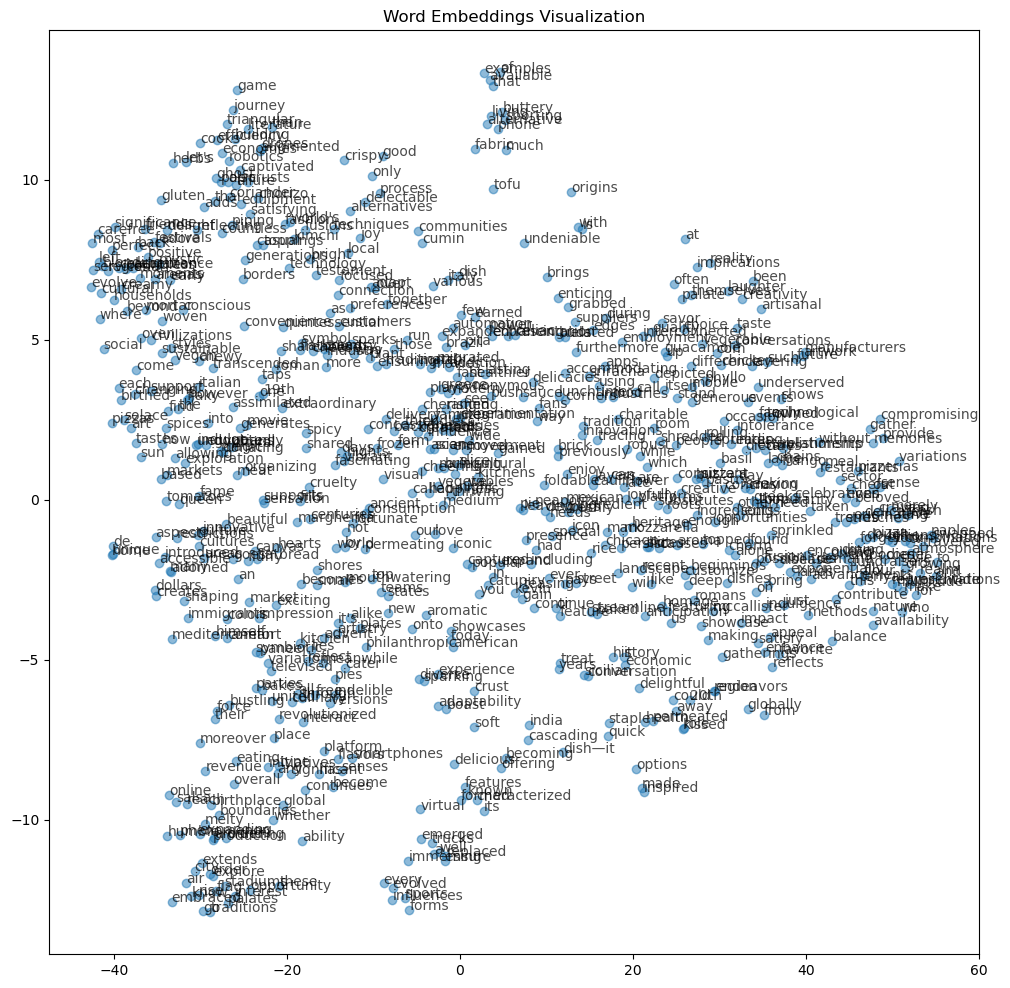

In [12]:
# Plotting word embeddings using t-SNE
embedding_layer = model.layers[0]
embedding_weights = embedding_layer.get_weights()[0]
tsne = TSNE(n_components=2, random_state=42)
embedding_tsne = tsne.fit_transform(embedding_weights)

plt.figure(figsize=(12, 12))
plt.subplot(1, 1, 1)
plt.scatter(embedding_tsne[:, 0], embedding_tsne[:, 1], alpha=0.5)
for i, word in enumerate(tokenizer.word_index.keys()):
    plt.annotate(word, xy=(embedding_tsne[i, 0], embedding_tsne[i, 1]), alpha=0.7)
plt.title('Word Embeddings Visualization')

plt.show()

In [13]:
# Generate next word predictions
seed_text = "Pizza has become "
next_words = 5

for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted_probs = model.predict(token_list)
    predicted_word = tokenizer.index_word[np.argmax(predicted_probs)]
    seed_text += " " + predicted_word

print("Next predicted words:", seed_text)

1/1 [==============================] - 0s 9ms/step
Next predicted words: Pizza has become  a symbol of comfort and
